  age salary purchased
1  20  19000         0
2  36  20000         0
3  27  43000         0
4  28  57000         0
5  20  76000         0 



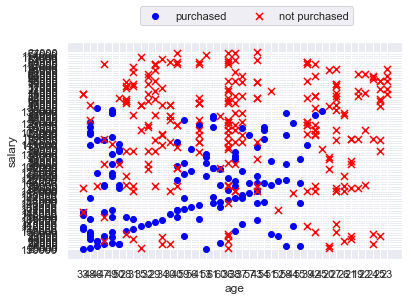

[[1.0 '20' '19000']
 [1.0 '36' '20000']
 [1.0 '27' '43000']
 ...
 [1.0 '51' '20000']
 [1.0 '37' '33000']
 [nan '50' '36000']]
(400, 3)
(400,)


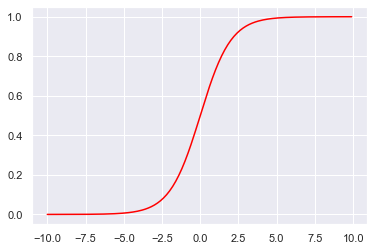

TypeError: can't multiply sequence by non-int of type 'float'

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

path=r'D:\jupyter\人工神经网络\data\S.csv'
data00=pd.read_csv(path,names=['age','salary','purchased'],encoding='utf-8')
data=data00.drop(0,axis=0,inplace=False)
print(data.head(),"\n")

positive = data[data.purchased.isin(['1'])]  # 1
negetive = data[data.purchased.isin(['0'])]  # 0

fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(positive['age'], positive['salary'], c='b', label='purchased')
ax.scatter(negetive['age'], negetive['salary'], s=50, c='r', marker='x', label='not purchased')
# 设置图例显示在图的上方
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width , box.height* 0.8])
ax.legend(loc='center left', bbox_to_anchor=(0.2, 1.12),ncol=3)
# 设置横纵坐标名
ax.set_xlabel('age')
ax.set_ylabel('salary')
plt.show()

def get_X(df):#读取特征
#     """
#     use concat to add intersect feature to avoid side effect
#     not efficient for big dataset though
#     """
    ones = pd.DataFrame({'ones': np.ones(len(df))})#ones是m行1列的dataframe
    data = pd.concat([ones, df], axis=1)  # 合并数据，根据列合并，concat拼接函数 ，相当于特征进行扩展
    return data.iloc[1:, :-1].values  # 这个操作返回 ndarray,不是矩阵，-1表示最后一列，但是左开右闭，所以正好是扩展后的前三列
#.as_matrix()变成了.values

def get_y(df):#读取标签（去最后一列）
#     '''assume the last column is the target'''
    return np.array(df.iloc[:, -1]) #df.iloc[:, -1]是指df的最后一列


def normalize_feature(df):
#     """Applies function along input axis(default 0) of DataFrame."""
    return df.apply(lambda column: (column - column.mean()) / column.std())#特征缩放 （每一列的元素-每一列的均值）/每一列的方差

X = get_X(data)
print(X)
print(X.shape)

y = get_y(data)
print(y.shape)

def sigmoid(z):
    return 1/(1 + np.exp(- z))

x1=np.arange(-10,10,0.1)
plt.plot(x1,sigmoid(x1),c='r')
plt.show()

theta = theta=np.zeros(3)
#theta
'''
def cost(theta, X, y):
    
    return np.mean(-y * np.log(sigmoid(X.dot(theta))) - (1 - y) * np.log(1 - sigmoid(X.dot(theta))))
# X @ theta与X.dot(theta)等价
cost(theta, X, y)
'''
def cost(theta, X, y):
    m = y.size
    cost = 0
    grad = np.zeros(theta.shape)
    hypothesis = sigmoid(np.dot(X, theta))
    cost = np.sum(-y * np.log(hypothesis) - (1 - y) * np.log(1 - hypothesis)) / m
    grad = np.dot(X.T, (hypothesis - y)) / m
    return cost, grad
cost(theta, X, y)


In [78]:
import scipy.optimize as opt
res = opt.minimize(fun=cost, x0=theta, args=(X, y), method='Newton-CG', jac=gradient)
print(res)

#用训练集预测和验证
def predict(x, theta):
    prob = sigmoid(x @ theta)
    return (prob >= 0.5).astype(int)

final_theta = res.x
y_pred = predict(X, final_theta)

print(classification_report(y, y_pred))

TypeError: can't multiply sequence by non-int of type 'float'